In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from datetime import datetime
import time,os
import requests,bs4

# 抓今天日期
today=datetime.now()
today_name=datetime.strftime(today,'%Y-%m-%d')

url='https://covid-19.nchc.org.tw/city_confirmed.php?downloadall=yes'
driver_path=Service('D:/chromedriver.exe')
driver=webdriver.Chrome(service=driver_path)
driver.get(url)

driver.find_element(By.TAG_NAME,'body').send_keys(Keys.END)
time.sleep(2)
driver.find_elements(By.CSS_SELECTOR,'#myTable02_wrapper .dt-buttons .dt-button')[2].click()

# 等待下載及掃毒
time.sleep(10)
print('下載csv完成') 

# 移動及更改檔名 若有移動檔案位置記得改new_fn
old_fn=r'C:/Users/USER/Downloads/vaccineCityLevel.csv'
new_fn=r'C:/Users/USER/git-repos/python3-junior-nogithub/Taiwan_COVID_19_Project/Csvs/Taiwan_COVID_19_'+today_name+'.csv'
try:
    os.rename(old_fn,new_fn)
    print('移動更名成功')
except Exception as err:
    # 檢查檔案是否存在
    if os.path.isfile(r'C:/Users/USER/git-repos/python3-junior-nogithub/Taiwan_COVID_19_Project/Csvs/Taiwan_COVID_19_'+today_name+'.csv'):
        print('原檔案已存在\n下載檔未移動')
        try:
            os.remove(old_fn)
        except OSError as e:
            print('下載檔刪除失敗',e)
        else:
            print('下載檔刪除成功')
    else:
        print('檔案不存在或移動更名失敗')
            
driver.close()

下載csv完成
原檔案已存在
下載檔未移動
下載檔刪除成功


In [3]:
# 字典方式排列縣市順序
import requests,bs4

url='http://www.isha.org.tw/tools/2012web_s_tools_02a_01%E7%B8%A3%E5%B8%82%E5%88%A5%E4%BB%A3%E7%A2%BC%E8%A1%A8.asp'
html=requests.get(url)
html.encoding='utf-8'
obj_soup=bs4.BeautifulSoup(html.text,'lxml')

obj_td2=obj_soup.find_all('td')
#print(obj_td2)

td2_list=[]
for td2 in obj_td2:
    txts=td2.text
    if txts=='桃園縣':
        txts='桃園市'
    td2_list.append(txts.strip())
    
# list可以透過slice轉成dict
taiwan_county_dict=dict(zip(td2_list[0::2],td2_list[1::2]))  
print(taiwan_county_dict,'\n')

# sorted排序後會轉list 所以需再轉dict
taiwan_county_dict=dict(sorted(taiwan_county_dict.items()))  # sorted排序後會轉list 所以需再轉dict
print(taiwan_county_dict,'\n')


taiwan_county_list=list(taiwan_county_dict.values())
print(taiwan_county_list)

{'01': '基隆市', '12': '嘉義市', '02': '台北市', '13': '嘉義縣', '03': '新北市', '14': '台南市', '04': '桃園市', '15': '高雄市', '05': '新竹市', '16': '屏東縣', '06': '新竹縣', '17': '台東縣', '07': '苗栗縣', '18': '花蓮縣', '08': '台中市', '19': '宜蘭縣', '09': '彰化縣', '20': '澎湖縣', '10': '南投縣', '21': '金門縣', '11': '雲林縣', '22': '連江縣'} 

{'01': '基隆市', '02': '台北市', '03': '新北市', '04': '桃園市', '05': '新竹市', '06': '新竹縣', '07': '苗栗縣', '08': '台中市', '09': '彰化縣', '10': '南投縣', '11': '雲林縣', '12': '嘉義市', '13': '嘉義縣', '14': '台南市', '15': '高雄市', '16': '屏東縣', '17': '台東縣', '18': '花蓮縣', '19': '宜蘭縣', '20': '澎湖縣', '21': '金門縣', '22': '連江縣'} 

['基隆市', '台北市', '新北市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '台中市', '彰化縣', '南投縣', '雲林縣', '嘉義市', '嘉義縣', '台南市', '高雄市', '屏東縣', '台東縣', '花蓮縣', '宜蘭縣', '澎湖縣', '金門縣', '連江縣']


In [4]:
# 台灣行政區域爬蟲 縣市與鄉鎮結合
import pandas as pd
import requests,bs4,re

url='https://c2e.ezbox.idv.tw/zipcode.php'
html=requests.get(url)
obj_soup=bs4.BeautifulSoup(html.text,'lxml')
obj_soup.encoding='utf-8'


city_list,area_list,area_list_2,county_list=[],[],[],[]
count=0

tag_1=obj_soup.find_all('div','pure-g')[1].find_all('div','pure-u-1')
print(tag_1)

# 刪除空字串
def remove_len_0(lists):
    for l in lists:
        if len(l)==0:
            lists.remove(l)  
        #print(l)
        
#print(tag_1)
for t_1 in tag_1:
    citys=t_1.find('div','city')
    areas=t_1.find('div','area')
    
    count+=1  # 給編號確認這網頁亂78遭的結構    
    citys_txt=citys.text.strip()
    citys_txt=citys_txt.replace('臺','台')
    areas_txt=areas.text.strip()
    areas_txt=re.sub(r'[0-9]+', '', areas_txt)  # 用正規表達式消除數字
    areas_txt=areas_txt.replace('\n\n\n\n','')
    areas_txt=areas_txt.replace('\n\n\n','')
    areas_txt=areas_txt.replace('\n\n','') 
    areas_txt=areas_txt.replace('\u3000','')

#     print(count,':',citys_txt)
#     print(count,':',areas_txt)
#     print()
    # 依照縣市的數量 讓鄉鎮按照順序加入陣列 兩個list數量才會一樣方便操作
    city_list.append(citys_txt)
    area_list.append(areas_txt)
        
    remove_len_0(city_list)
    remove_len_0(area_list)
    
#print('縣市:',city_list)

#print('縣市:',len(city_list))
#print('鄉鎮:',area_list)
#print('鄉鎮:',len(area_list))

for index,obj in enumerate(area_list):
    #print(obj)
    area_=obj.split('\n')
    
    for a in area_:
        # 找出各縣市連在一起的兩個鄉鎮錯誤名稱
        if len(a)==6:
            print(index,a)
            f3=a[0:3]
            b3=a[3:6]
            
            # 將分開後的鄉鎮依序加到該縣市list
            area_.append(f3)    
            area_.append(b3)
            # 移除錯誤項目
            area_.remove(a)
    #print(area_)
    
    area_list_2.append(area_)
    # 單list當鍵 雙list當值 轉list不要給索引值啦 直接變dict就好
    area_dict=dict(zip(city_list,area_list_2))
print(area_dict)

[<div class="pure-u-1 pure-u-sm-1-2 pure-u-md-1-4 div-table">
<div class="city center"><a href="/address/%E8%87%BA%E5%8C%97%E5%B8%82" name="zone1">臺北市</a></div>
<div class="area center">
<ul>
<li><a href="/address/臺北市/中正區">中正區</a>100</li>
<li><a href="/address/臺北市/大同區">大同區</a>103</li>
<li><a href="/address/臺北市/中山區">中山區</a>104</li>
<li><a href="/address/臺北市/松山區">松山區</a>105</li>
<li><a href="/address/臺北市/大安區">大安區</a>106</li>
<li><a href="/address/臺北市/萬華區">萬華區</a>108</li>
<li><a href="/address/臺北市/信義區">信義區</a>110</li>
<li><a href="/address/臺北市/士林區">士林區</a>111</li>
<li><a href="/address/臺北市/北投區">北投區</a>112</li>
<li><a href="/address/臺北市/內湖區">內湖區</a>114</li>
<li><a href="/address/臺北市/南港區">南港區</a>115</li>
<li><a href="/address/臺北市/文山區">文山區</a>116</li>
</ul>
</div>
</div>, <div class="pure-u-1 pure-u-sm-1-2 pure-u-md-1-4 div-table fill-table"><div class="city"> </div><div class="area"></div></div>, <div class="pure-u-1 pure-u-sm-1-2 pure-u-md-1-4 div-table">
<div class="city center"><a href="

In [5]:
# 轉換成本月及上個月的月份
def Change_months_fn(today_name):
    global today_new,today_old,month_new,month_old,year_new
    today_new=today_name[0:7]
    year_new=today_new.split('-')[0]
    month_new=today_new.split('-')[1]
    # 如果本月是1月 上個月的年份要-1
    if month_new=='01':
        month_old='12'
        year_old=int(year_new)-1
    else:
        year_old=year_new
        month_old=int(month_new)-1 
        if month_old<10:
            month_old='0'+str(month_old)
    today_old=str(year_old)+'-'+str(month_old)
    print(today_new)  # 本月份
    print(today_old)   # 上個月份
    
Change_months_fn(today_name)

2022-04
2022-03


0        0
1        0
2        0
3        0
4        0
        ..
55685    0
55686    0
55687    0
55688    0
55689    0
Length: 55690, dtype: int64
           id       個案研判日       個案公佈日    縣市   鄉鎮 性別 是否為境外移入    年齡層
0          21  2022-04-24  2022-04-24   彰化縣  溪湖鎮  男       否    5-9
1          20  2022-04-24  2022-04-24   彰化縣  大村鄉  女       否  20-24
2          19  2022-04-24  2022-04-24   彰化縣  埤頭鄉  男       否  30-34
3          17  2022-04-24  2022-04-24   彰化縣  員林市  男       否  30-34
4          18  2022-04-24  2022-04-24   彰化縣  員林市  男       否  35-39
...       ...         ...         ...   ...  ... ..     ...    ...
55685  55,686  2020-01-27  2020-01-27  境外移入   空值  女       是  50-54
55686  55,687  2020-01-26  2020-01-26  境外移入   空值  女       是  55-59
55687  55,688  2020-01-24  2020-01-24  境外移入   空值  女       是  50-54
55688  55,689  2020-01-24  2020-01-24  境外移入   空值  男       是  55-59
55689  55,690  2020-01-22  2020-01-22  境外移入   空值  女       是  55-59

[55690 rows x 8 columns]
[[], [], [], []]
台北市


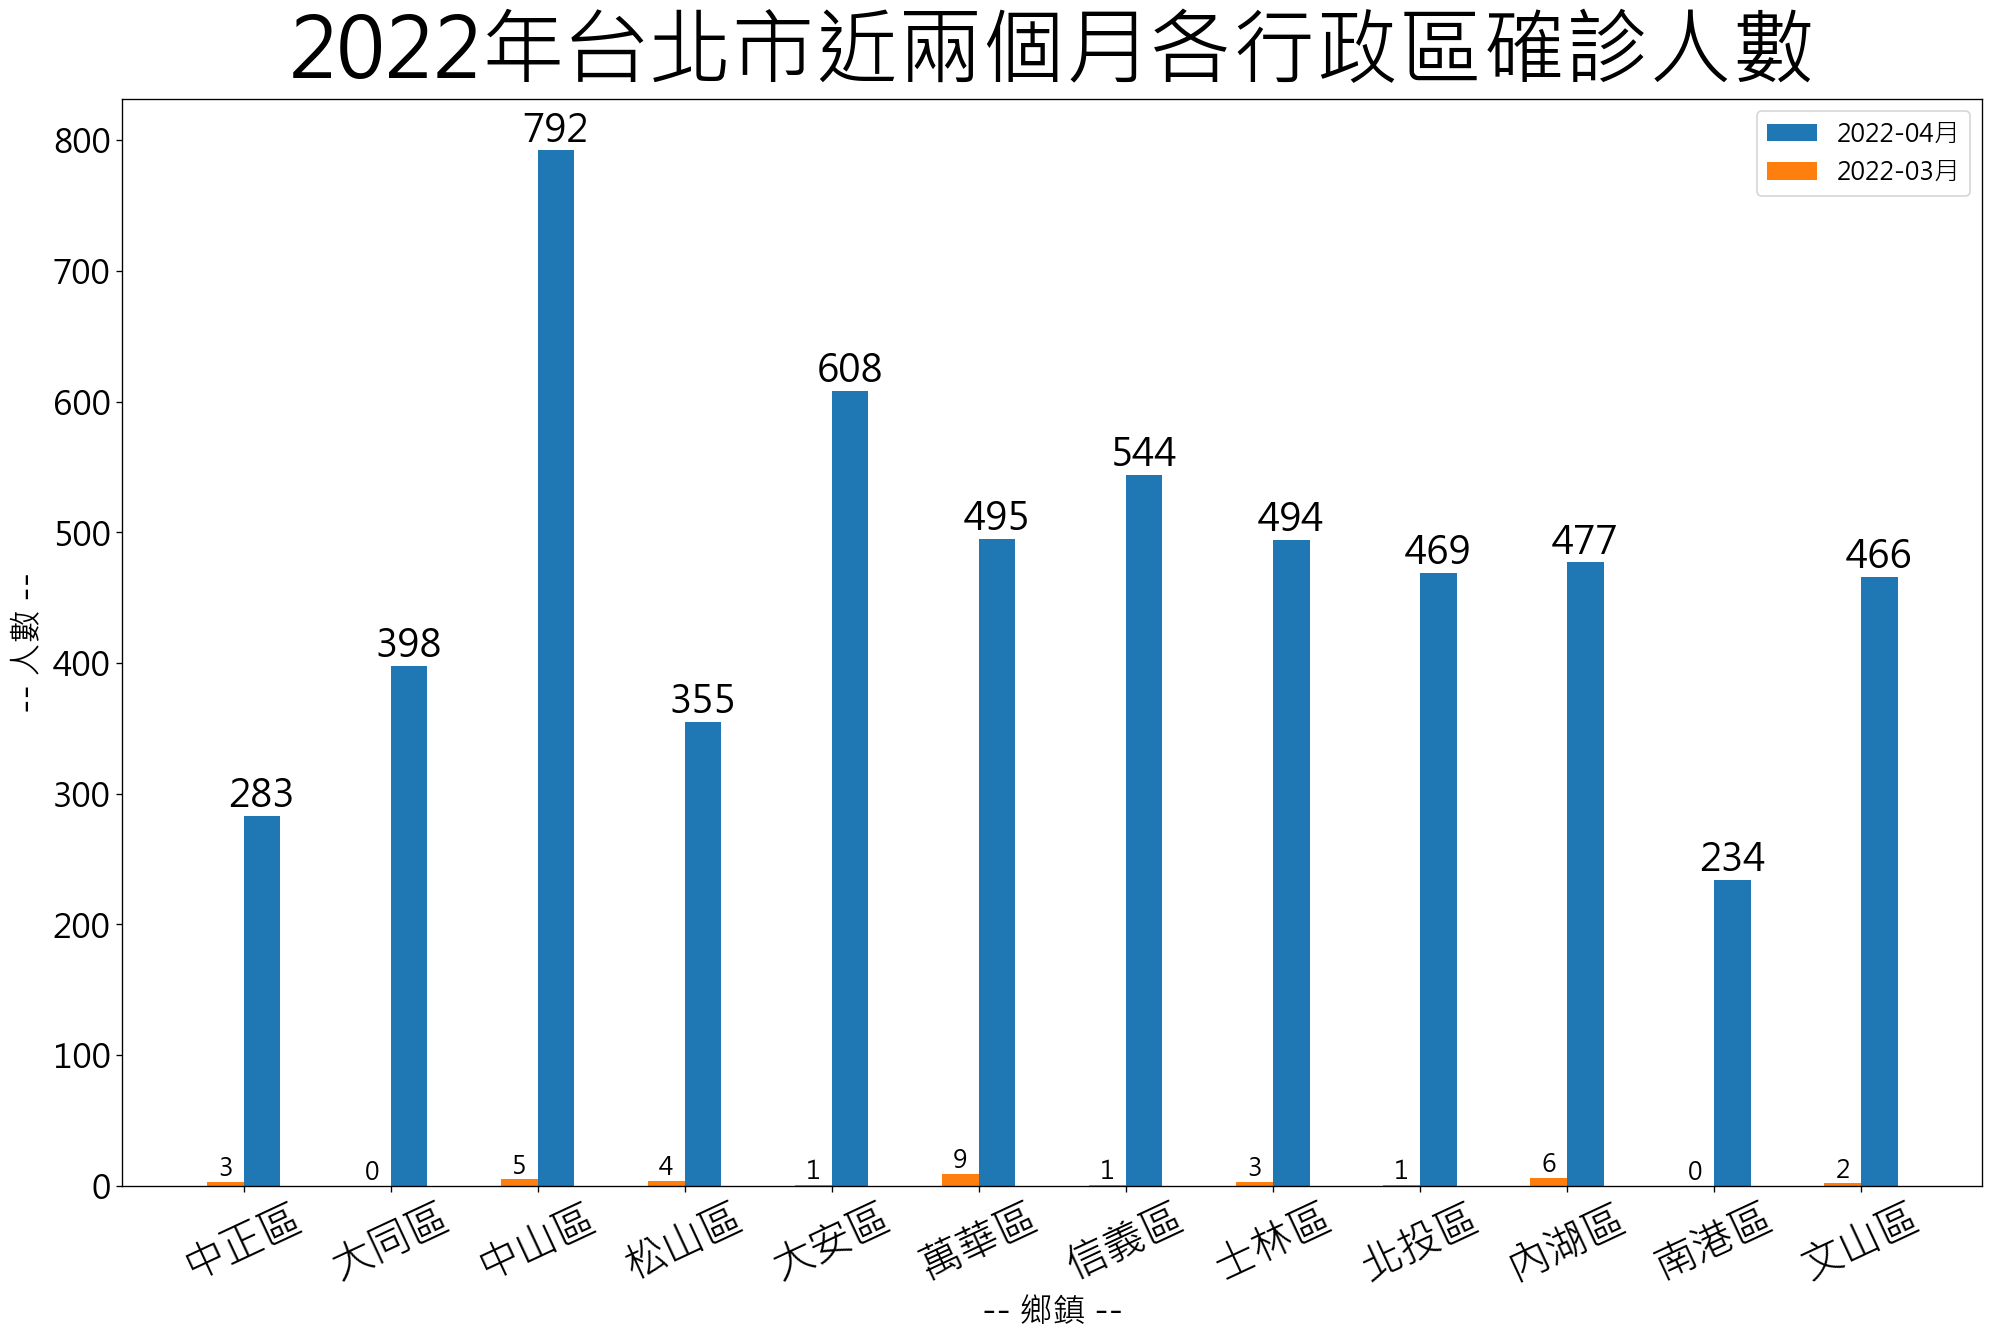

南海島
釣魚台
基隆市
基隆市 : ['仁愛區', '信義區', '中正區', '中山區', '安樂區', '暖暖區', '七堵區']
405
401
437
241
362
190
133
--------------------------------------------------
   行政區  2022-03月  2022-04月
0  仁愛區        18       405
1  信義區        16       401
2  中正區        19       437
3  中山區        13       241
4  安樂區        23       362
5  暖暖區         8       190
6  七堵區         4       133


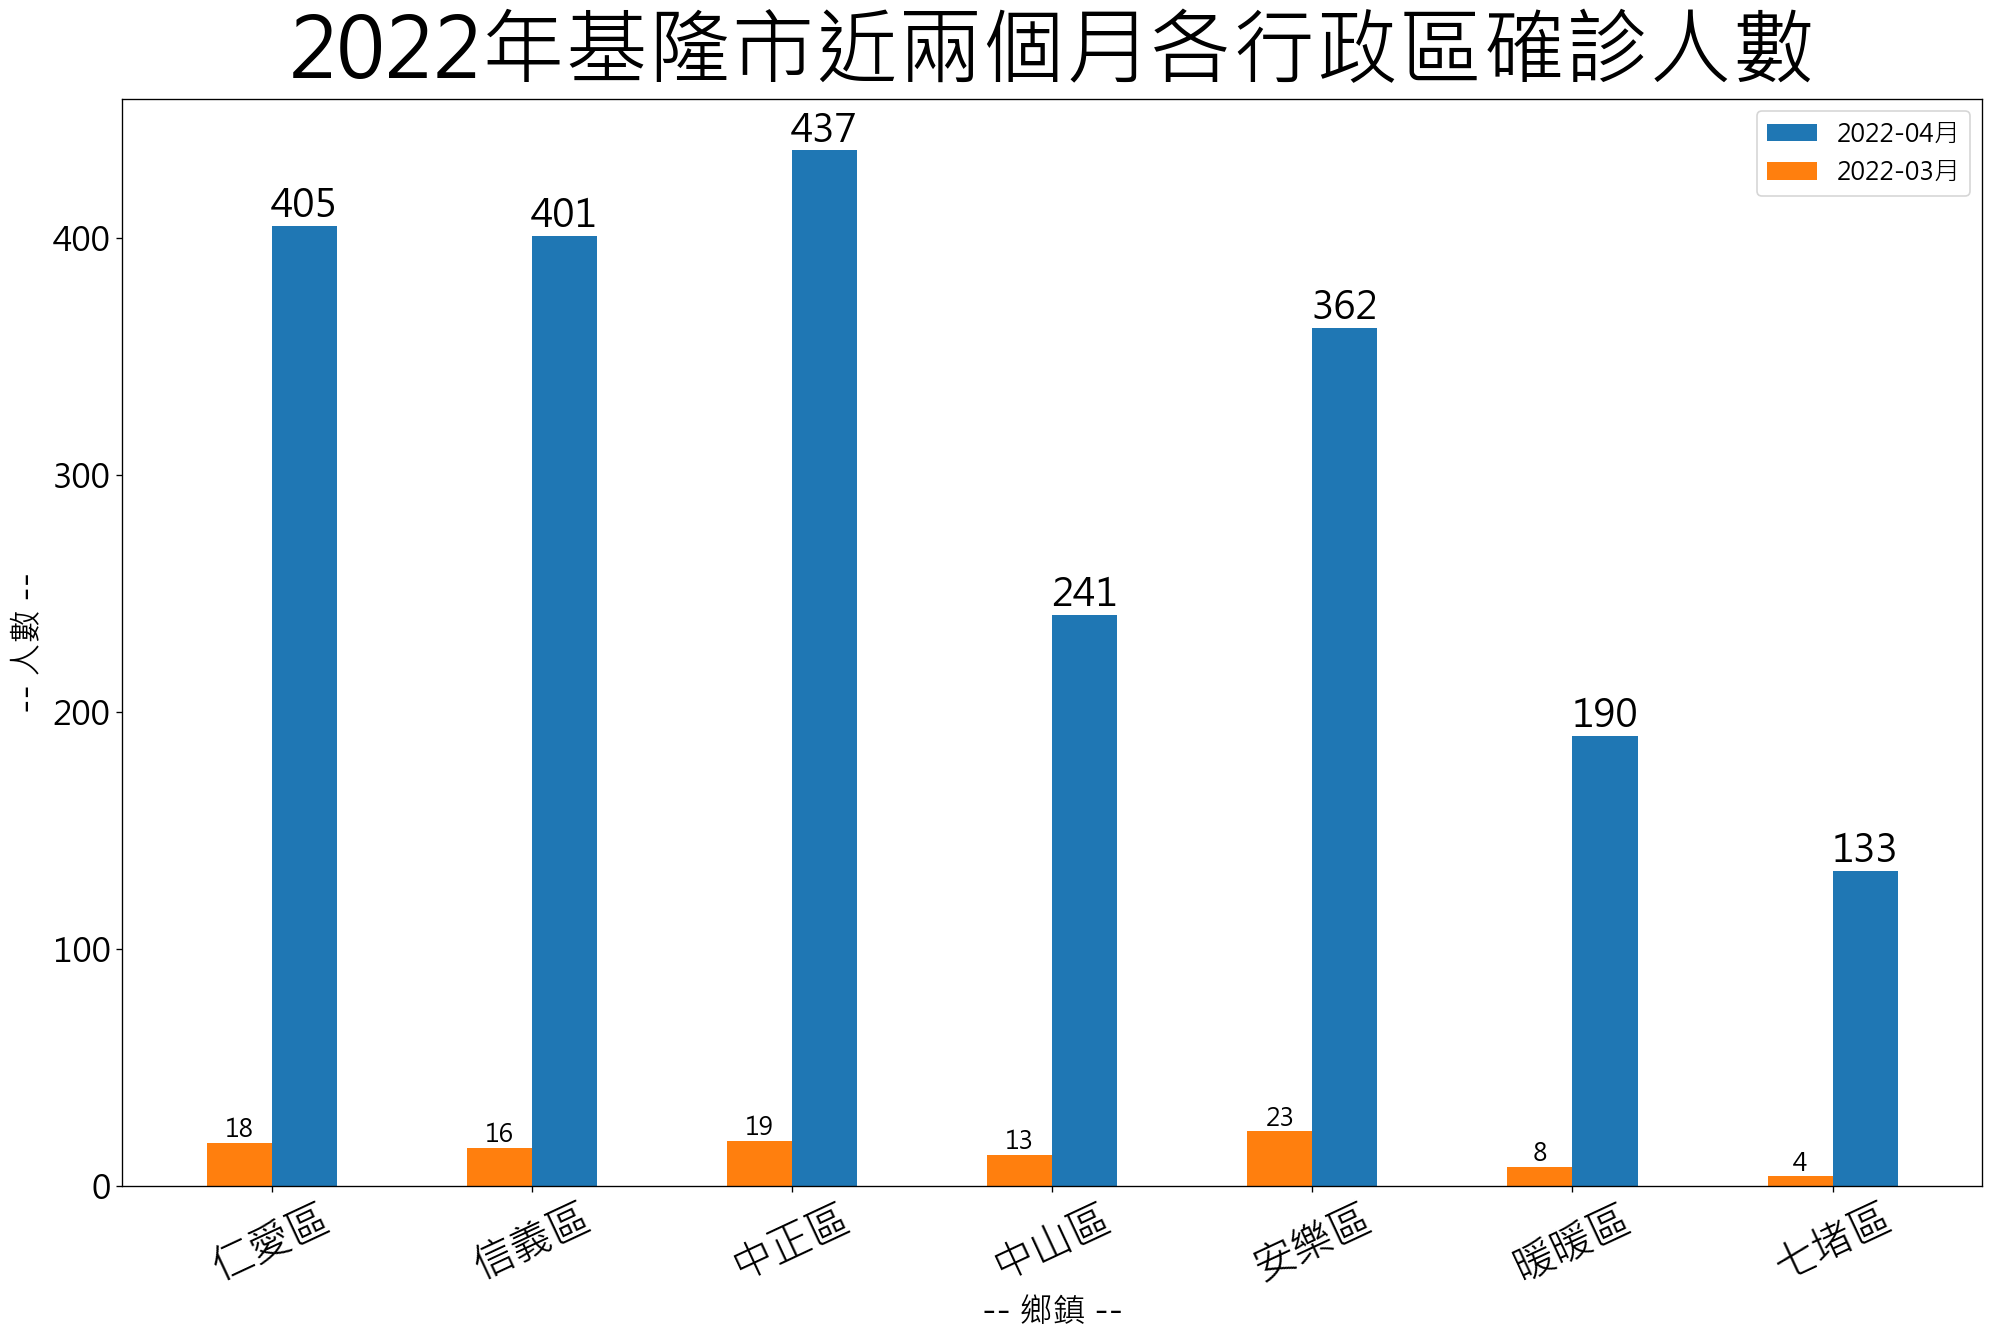

新北市
新北市 : ['萬里區', '金山區', '板橋區', '汐止區', '深坑區', '石碇區', '瑞芳區', '平溪區', '雙溪區', '貢寮區', '新店區', '坪林區', '烏來區', '永和區', '三峽區', '樹林區', '鶯歌區', '三重區', '新莊區', '泰山區', '林口區', '蘆洲區', '五股區', '八里區', '淡水區', '三芝區', '石門區', '中和區', '土城區']
18
26
1504
492
60
4
256
3
9
25
784
1
16
398
499
397
232
1203
1270
153
170
429
217
62
358
14
7
1169
599
--------------------------------------------------
    行政區  2022-03月  2022-04月
0   萬里區         1        18
1   金山區         0        26
2   板橋區         5      1504
3   汐止區         4       492
4   深坑區         1        60
5   石碇區         0         4
6   瑞芳區         1       256
7   平溪區         0         3
8   雙溪區         0         9
9   貢寮區         0        25
10  新店區        10       784
11  坪林區         0         1
12  烏來區         0        16
13  永和區         3       398
14  三峽區         6       499
15  樹林區        27       397
16  鶯歌區         0       232
17  三重區         7      1203
18  新莊區         4      1270
19  泰山區         2       153
20  林口區         3       170
21  蘆洲區         

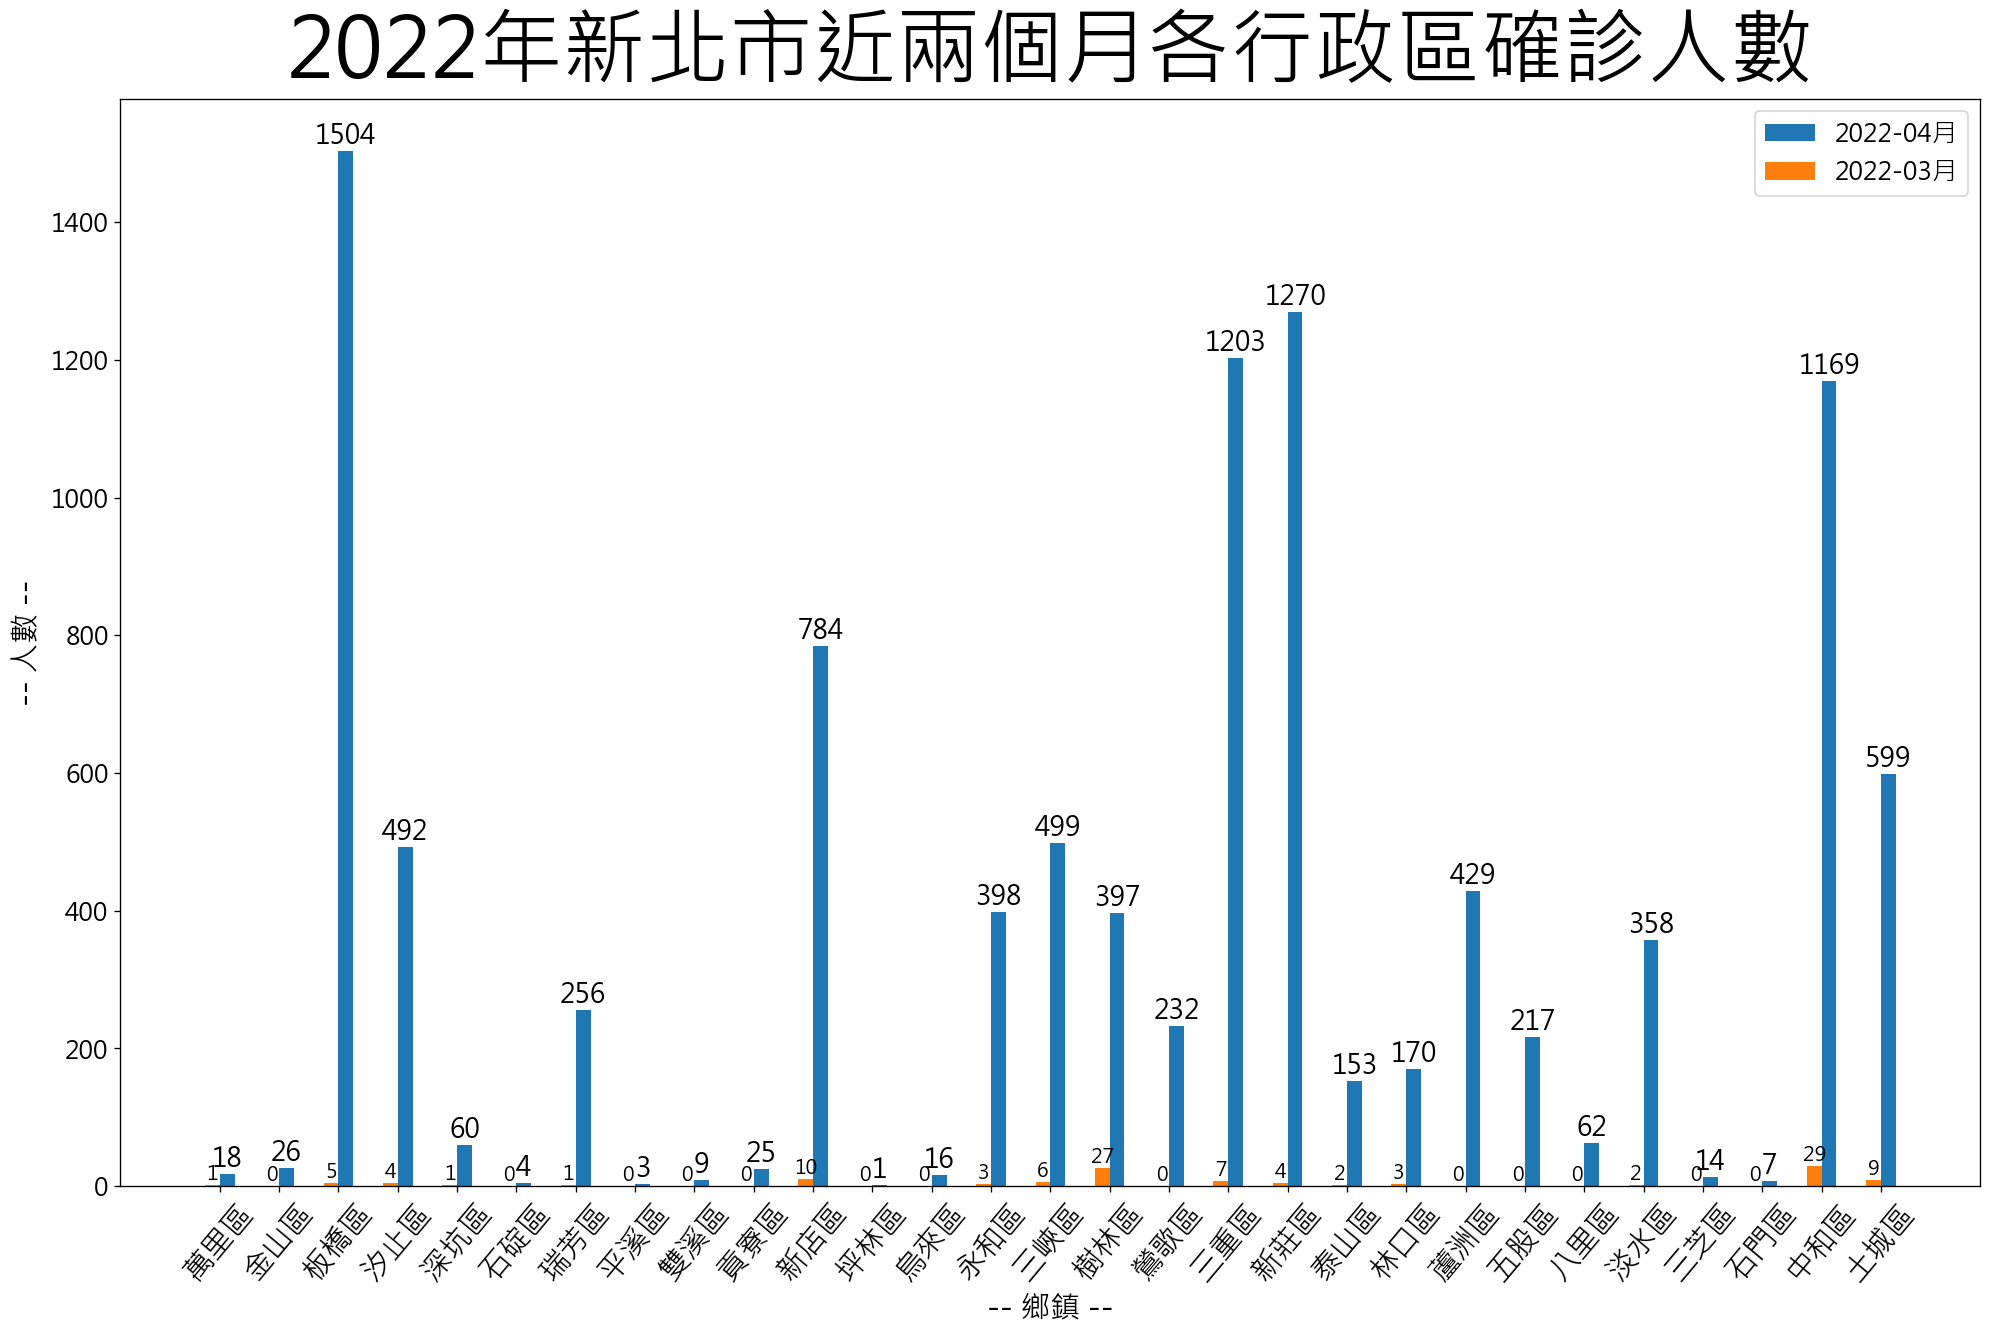

宜蘭縣
連江縣
新竹市
新竹縣
桃園市
苗栗縣
台中市
彰化縣
南投縣
嘉義市
嘉義縣
嘉義縣 : ['番路鄉', '梅山鄉', '竹崎鄉', '阿里山', '中埔鄉', '大埔鄉', '水上鄉', '鹿草鄉', '太保市', '六腳鄉', '新港鄉', '民雄鄉', '大林鎮', '溪口鄉', '義竹鄉', '布袋鎮', '朴子市', '東石鄉']
0
11
3
0
0
0
12
0
13
1
1
8
27
2
0
0
3
0
--------------------------------------------------
    行政區  2022-03月  2022-04月
0   番路鄉         0         0
1   梅山鄉         0        11
2   竹崎鄉         0         3
3   阿里山         0         0
4   中埔鄉         0         0
5   大埔鄉         0         0
6   水上鄉         0        12
7   鹿草鄉         0         0
8   太保市         1        13
9   六腳鄉         4         1
10  新港鄉         0         1
11  民雄鄉         1         8
12  大林鎮         0        27
13  溪口鄉         0         2
14  義竹鄉         0         0
15  布袋鎮         0         0
16  朴子市         0         3
17  東石鄉         0         0


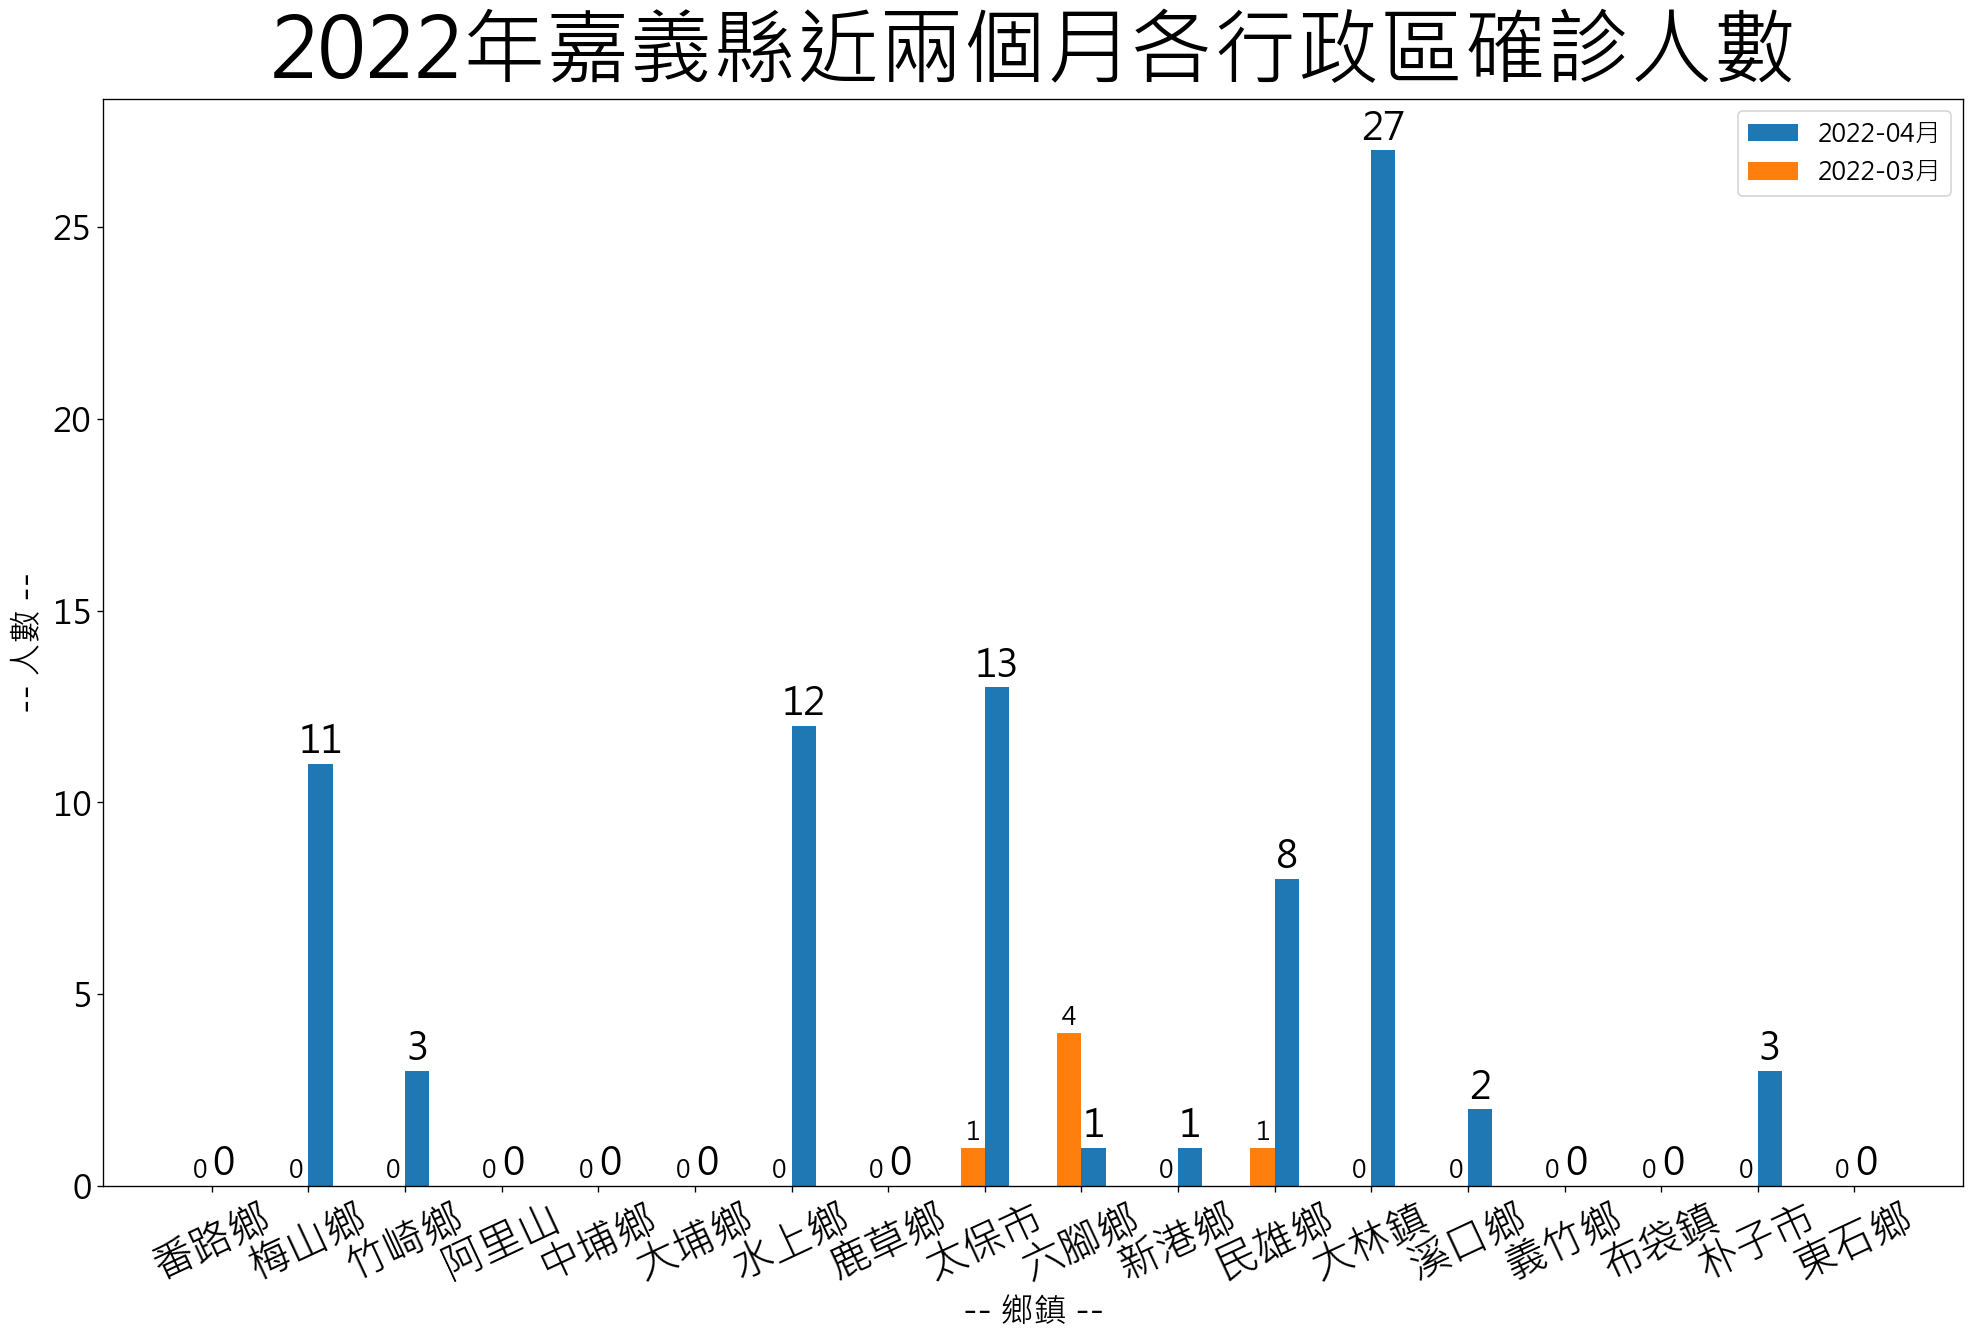

雲林縣
台南市
高雄市
屏東縣
澎湖縣
金門縣
台東縣
花蓮縣


In [19]:
# 縣市各行政區確診 柱狀圖
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 輸入想要畫的縣市
north=['台北市','新北市','嘉義縣','基隆市']   # 輸入想尋找的縣市
counts=0 

fn='Csvs/Taiwan_COVID_19_'+today_name+'.csv'
df=pd.read_csv(fn)
# 找出每行的列是否有空值
print(pd.isnull(df).sum(axis=1))  # 按行方向印出內容是否空值 因此axis=1
df.dropna(axis=0,how='any')     # 刪除列 因此axis=0
print(df)

# 不簡便寫法
# list1,list2,list3,list4,list5=[],[],[],[],[]
# nums_area_list=[list1,list2,list3,list4,list5]

# 比上面方面很多 依照數量一次創建多個list放入一個大list
nums_area_list=[list() for n in range(len(north))]
print(nums_area_list)

# 慢慢縮小尋找的值 .str.contains()包含哪些字串
df_new=df.loc[df['個案公佈日'].str.contains(today_new)]  # 2022年4月
df_old=df.loc[df['個案公佈日'].str.contains(today_old)]  # 2022年3月

#     df_north=df.loc[df['縣市']==obj]
    
# 先有各區人數表格 才能畫圖
def County_Area_Fn(df_):
    df_=df_.loc[df_['鄉鎮']==a_obj]
    len_=len(df_)
    return len_   

# 畫圖 n_obj給圖的標題 
def plot_pic(n_obj,value):
    # 顯示中文
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(dpi=120,figsize=(20,12))

    # 設定x軸柱狀位置
    x_position=np.arange(len(value))
    x_width=0.25  # 柱狀寬度

    plt.bar(x_position+(x_width/2),df_nums_area[today_new+'月'],label=today_new+'月', width=0.25)
    plt.bar(x_position-(x_width/2),df_nums_area[today_old+'月'],label=today_old+'月', width=0.25)

    plt.title(year_new+'年'+n_obj+'近兩個月各行政區確診人數',fontsize=50)

    if len(value)>20:
        plt.xticks(x_position,value,fontsize=18,rotation=50)
        plt.yticks(fontsize=15)
        plt.legend(loc='best',fontsize=15)
        plt.xlabel('-- 鄉鎮 --',fontsize=18)
        plt.ylabel('-- 人數 --',fontsize=18)
        # 柱狀圖頂端顯示數值
        for a,b in zip(x_position+(x_width/2),df_nums_area[today_new+'月']):
            plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=16)
        for a,b in zip(x_position-(x_width/2),df_nums_area[today_old+'月']):
            plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
    else:
        plt.xticks(x_position,value,fontsize=25,rotation=25)
        plt.yticks(fontsize=20)
        plt.legend(loc='best',fontsize=15)
        plt.xlabel('-- 鄉鎮 --',fontsize=20)
        plt.ylabel('-- 人數 --',fontsize=20)
        # 柱狀圖頂端顯示數值
        for a,b in zip(x_position+(x_width/2),df_nums_area[today_new+'月']):
            plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=23)
        for a,b in zip(x_position-(x_width/2),df_nums_area[today_old+'月']):
            plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
    plt.show()
    
for key,value in area_dict.items(): 
    print(key)
    for n_index,n_obj in enumerate(north):   
        # 如果字典中有符合north的縣市 就取出2022年4月的df裡所有符合north縣市的欄位
        if key==north[n_index]:
            df_area_new=df_new.loc[df['縣市']==north[n_index]]
            df_area_old=df_old.loc[df['縣市']==north[n_index]]
            print(north[n_index],':',value)

            for a_i,a_obj in enumerate(value):
                nums_area_new=County_Area_Fn(df_area_new)  # 透過County_Area_Fn函數取出north縣市的各行政區域確診人數
                nums_area_old=County_Area_Fn(df_area_old)
                print(nums_area_new)
                nums_area_list[n_index].append([a_obj,nums_area_old,nums_area_new])  # 列出north的縣市 一次一縣市
        #print(nums_area_list)
            df_nums_area=pd.DataFrame(nums_area_list[n_index],columns=['行政區',today_old+'月',today_new+'月'])  # 將上面一次一縣市的list轉df
            print('-'*50)
            print(df_nums_area)           
            plot_pic(n_obj,value)            
        else:  
            pass 
   